<a href="https://colab.research.google.com/github/lmacanda/Sales-Analyses/blob/main/Aula5%2C6%2C7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aula 5, 6, 7

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


produtos = pd.read_csv("/content/produtos.csv")
produtos.head()


,produto_id,nome_produto,categoria,preco_unitario,estoque
0,1001,Camiseta Básica,Vestuário,49.9,120
1,1002,Tênis Corrida,Calçados,199.0,80
2,1003,Mochila Urbana,Acessórios,89.9,50
3,1004,Jaqueta Corta-Vento,Vestuário,149.9,60
4,1005,Calça Jeans,Vestuário,79.9,90


In [2]:
vendas = pd.read_excel("/content/vendas.xlsx")
vendas.head()

,venda_id,produto_id,cliente_id,data,quantidade,preco_unitario,valor_total
0,1,1001,C0001,2024-01-01,2,49.9,99.8
1,2,1002,C0002,2024-01-01,1,199.0,199.0
2,3,1003,C0003,2024-01-02,3,89.9,269.7
3,4,1004,C0004,2024-01-03,1,149.9,149.9
4,5,1005,C0005,2024-01-04,2,79.9,159.8


In [61]:


datas = pd.read_csv("/content/datas.csv")
print(datas.head())


         data dia_da_semana  feriado
0  01/01/2024        Monday        1
1  02/01/2024       Tuesday        0
2  03/01/2024     Wednesday        0
3  04/01/2024      Thursday        0
4  05/01/2024        Friday        0


In [6]:
cliente = pd.read_csv("/content/cliente.csv")
cliente.head()

,cliente_id,nome,idade,cidade
0,C0001,Ana,28,São Paulo
1,C0002,Bruno,35,Belo Horizonte
2,C0003,Carla,22,Recife
3,C0004,Diego,30,Rio de Janeiro
4,C0005,Eduarda,27,Porto Alegre


In [46]:
# merge vndas and produtos tables on "produto_id"
vendas_e_produtos = pd.merge(vendas, produtos, on="produto_id")




1.   *Qual produto gerou mais receita total?*







In [71]:
# Group the products by name
vendas_por_produto = vendas_e_produtos.groupby("nome_produto")["valor_total"].sum()


venda_maior = vendas_por_produto.sort_values(ascending=False)

nome_produto = venda_maior.index[0]
valor_vendas_produto = venda_maior.iloc[0]

print(f"O produto que vendeu mais è: {nome_produto} €{valor_vendas_produto}")



O produto que vendeu mais è: Mochila Urbana €269.7




2*.   Qual categoria vendeu mais unidades?*



In [72]:
#Group the category by total value
vendas_por_categoria = vendas_e_produtos.groupby("categoria")["valor_total"].sum()
vendas_categoria_ordenada = vendas_por_categoria.sort_values(ascending=False)

nome_categoria = vendas_categoria_ordenada.index[0]
valor_vendas_categoria = vendas_categoria_ordenada.iloc[0]


print(f"A categoria que vendeu mais unidades é: {nome_categoria} €{valor_vendas_categoria}")

A categoria que vendeu mais unidades é: Acessórios €649.3


7. *Gere um gráfico de barras com receita por categoria*

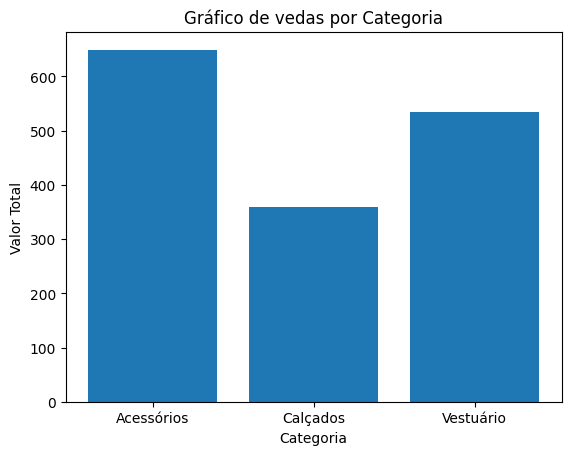

In [14]:
plt.bar(vendas_por_categoria.index, vendas_por_categoria.values)
plt.title("Gráfico de vedas por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Valor Total")
plt.show()


3.   Qual é o ticket médio por cliente?






In [59]:
# Merge with cliente.csv
vendas_e_cliente = vendas_e_produtos.merge(cliente, on="cliente_id")


In [55]:
# Divide the total purchased (total_value) by the number of purchases per customer_id.

ticket_medio = vendas.groupby("cliente_id")["valor_total"].sum() / vendas.groupby("cliente_id")["quantidade"].sum()

print(ticket_medio)

cliente_id
C0001     49.9
C0002    199.0
C0003     89.9
C0004    149.9
C0005     79.9
C0006    129.9
C0007     25.0
C0008    159.9
C0009     69.9
C0010     89.9
dtype: float64



4.   Em quais dias da semana ocorrem mais vendas?




In [60]:

#check data types
print(vendas_e_cliente["data"].dtypes)

# convert data to "datetime"

vendas_e_cliente["data"] = pd.to_datetime(vendas_e_cliente["data"])
datas['data'] = pd.to_datetime(datas["data"],dayfirst=True)

# Merge with datas.csv and group by day_of_week.

vendas_e_datas = vendas_e_cliente.merge(datas, on="data")
print(vendas_e_datas)

datetime64[ns]
   venda_id  produto_id cliente_id       data  quantidade  preco_unitario_x  \
0         1        1001      C0001 2024-01-01           2              49.9   
1         2        1002      C0002 2024-01-01           1             199.0   
2         3        1003      C0003 2024-01-02           3              89.9   
3         4        1004      C0004 2024-01-03           1             149.9   
4         5        1005      C0005 2024-01-04           2              79.9   
5         6        1006      C0006 2024-01-05           1             129.9   
6         7        1007      C0007 2024-01-06           5              25.0   
7         8        1008      C0008 2024-01-07           1             159.9   
8         9        1009      C0009 2024-01-08           1              69.9   
9        10        1010      C0010 2024-01-09           2              89.9   

   valor_total         nome_produto   categoria  preco_unitario_y  estoque  \
0         99.8      Camiseta Básica  

In [73]:
#Group day of the week by total value
vendas_por_dia_semana = vendas_e_datas.groupby("dia_da_semana")["valor_total"].sum()
dia_maior_vendas = print(vendas_por_dia_semana.sort_values(ascending=False))


dia_da_semana
Tuesday      449.5
Monday       368.7
Sunday       159.9
Thursday     159.8
Wednesday    149.9
Friday       129.9
Saturday     125.0
Name: valor_total, dtype: float64


6. *Filtre vendas feitas em feriados.*

In [78]:
vendas_feriados = vendas_e_datas["feriado"] == 1
feriados= vendas_e_datas[vendas_feriados]

8. *Crie um gráfico de linha com vendas diárias.*




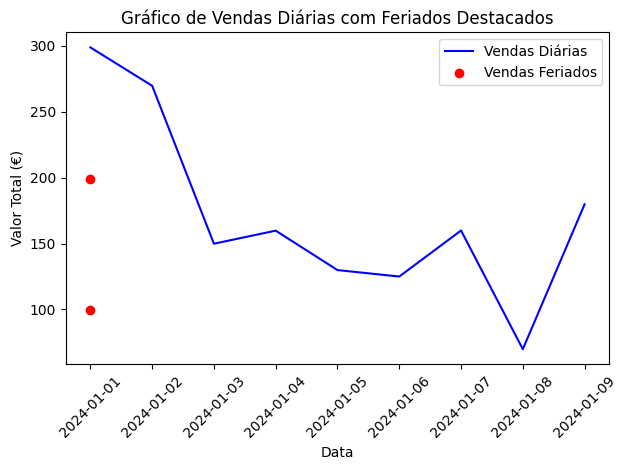

In [79]:
vendas_por_dia_index = vendas_e_datas.groupby(["data","feriado"])["valor_total"].sum().reset_index()

plt.plot(vendas_por_dia_index["data"], vendas_por_dia_index["valor_total"], label="Vendas Diárias", color="blue")


plt.scatter(feriados["data"], feriados["valor_total"], color="red", label="Vendas Feriados")

plt.title("Gráfico de Vendas Diárias com Feriados Destacados")
plt.xlabel("Data")
plt.ylabel("Valor Total (€)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

5. *Crie uma nova coluna tipo_cliente:*

Se a idade for < 30 → "Jovem", >= 30 → "Adulto".

In [76]:
vendas_e_datas["tipo_cliente"] = np.where(vendas_e_datas["idade"] < 30, "Jovem", "Adulto")

print(vendas_e_datas)



   venda_id  produto_id cliente_id       data  quantidade  preco_unitario_x  \
0         1        1001      C0001 2024-01-01           2              49.9   
1         2        1002      C0002 2024-01-01           1             199.0   
2         3        1003      C0003 2024-01-02           3              89.9   
3         4        1004      C0004 2024-01-03           1             149.9   
4         5        1005      C0005 2024-01-04           2              79.9   
5         6        1006      C0006 2024-01-05           1             129.9   
6         7        1007      C0007 2024-01-06           5              25.0   
7         8        1008      C0008 2024-01-07           1             159.9   
8         9        1009      C0009 2024-01-08           1              69.9   
9        10        1010      C0010 2024-01-09           2              89.9   

   valor_total         nome_produto   categoria  preco_unitario_y  estoque  \
0         99.8      Camiseta Básica   Vestuário     

*9. Os produtos mais caros são os mais vendidos?*


In [82]:
# Compare average price with total quantity per product.
analise_produtos = vendas_e_produtos.groupby("nome_produto").agg({
    "preco_unitario_x": "mean",
    "quantidade": "sum"
}).reset_index()


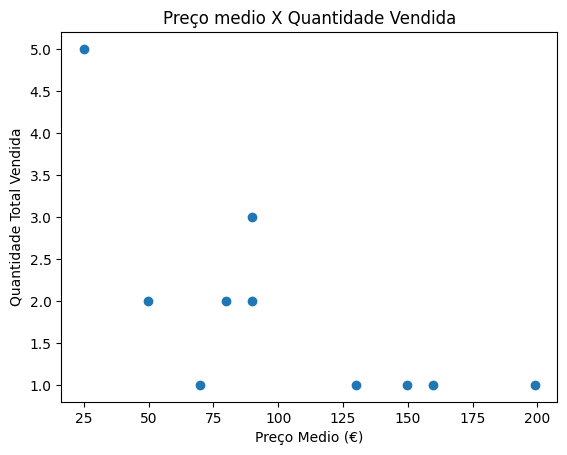

In [18]:
plt.scatter(analise_produtos["preco_unitario_x"], analise_produtos["quantidade"])
plt.title("Preço medio X Quantidade Vendida")
plt.xlabel("Preço Medio (€)")
plt.ylabel("Quantidade Total Vendida")
plt.show()


*10. Clientes mais jovens gastam mais ou menos?*

Crie um boxplot de valor_total por faixa etária.

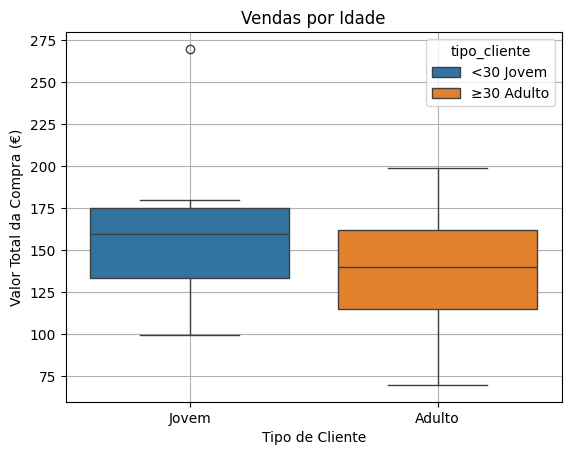

In [81]:
sns.boxplot(data=vendas_e_datas, x="tipo_cliente", y="valor_total", hue="tipo_cliente")

plt.title("Vendas por Idade")
plt.xlabel("Tipo de Cliente")
plt.ylabel("Valor Total da Compra (€)")
plt.grid(True)

plt.legend(title= "tipo_cliente", loc= "upper right", labels=["<30 Jovem", "≥30 Adulto"])




plt.show()